In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

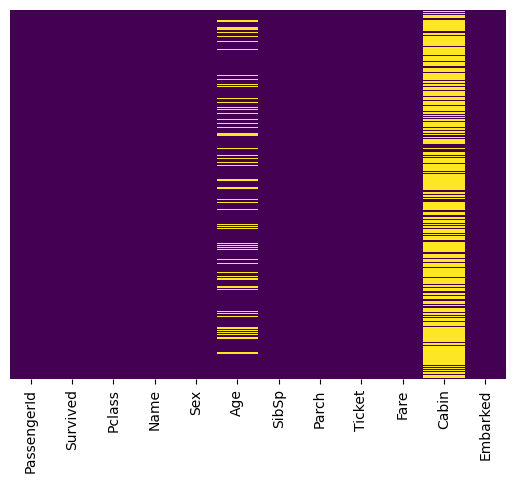

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

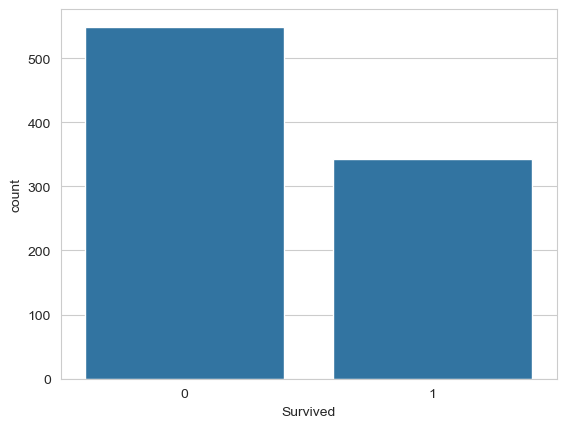

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

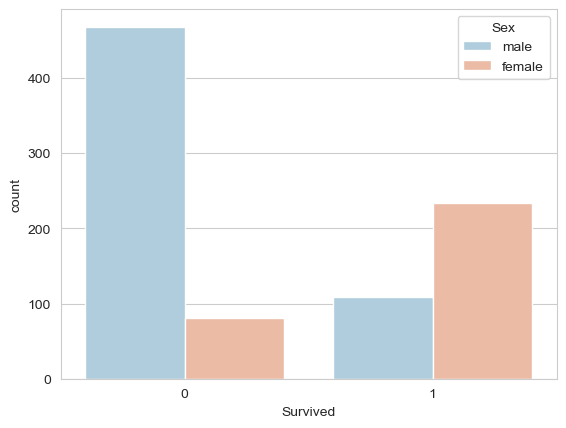

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

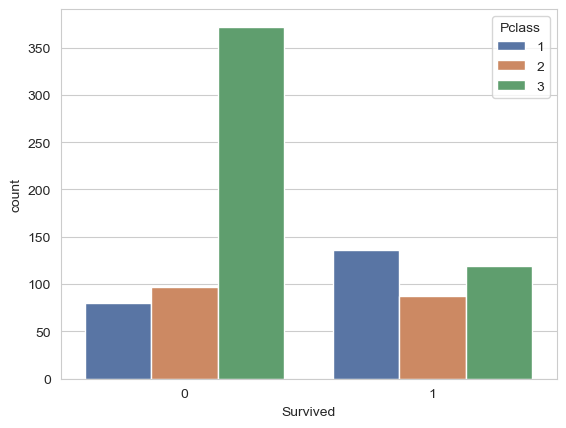

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train,palette='deep')

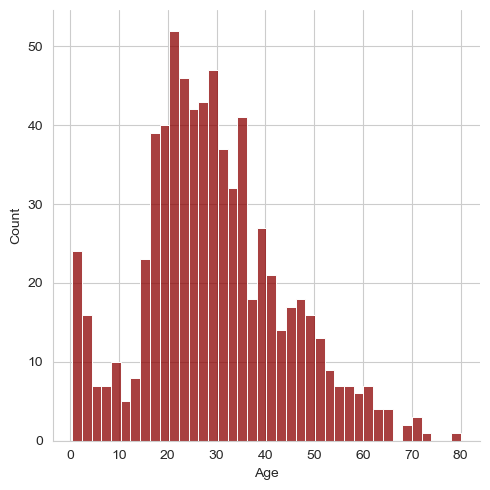

In [8]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

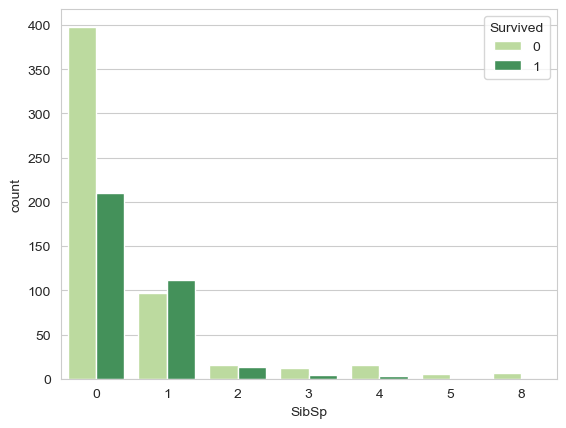

In [9]:
sns.countplot(x='SibSp',data=train, hue='Survived', palette='YlGn' )

<Axes: >

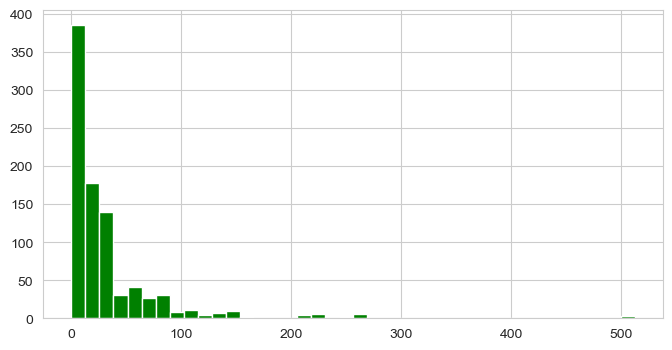

In [10]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

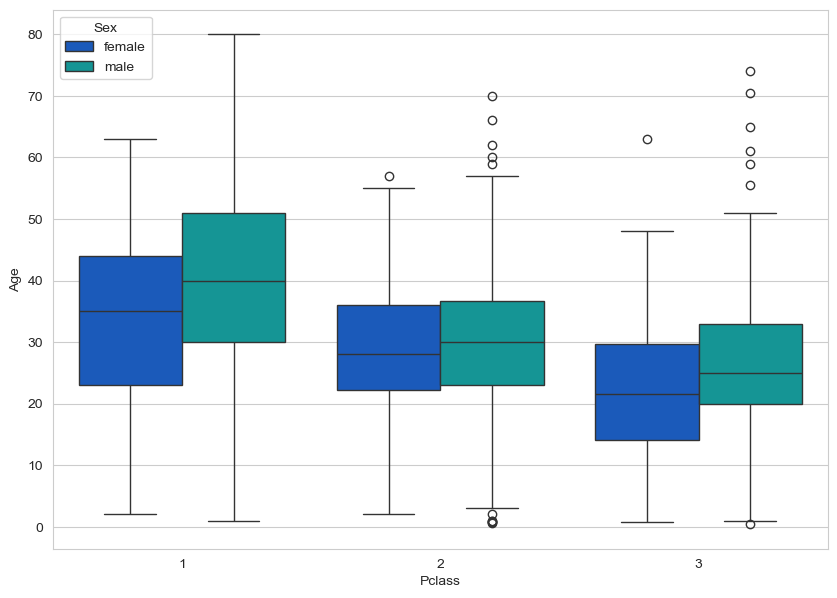

In [11]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train,palette='winter')

In [12]:
def impute_age(cols):
    Age=cols.iloc[0]
    Pclass=cols.iloc[1]
    Sex=cols.iloc[2]
    
    if pd.isnull(Age):
        if Pclass==1 and Sex=='female':
            return 36
        elif Pclass==1 and Sex=='male':
            return 40
        
        elif Pclass==2 and Sex=='female':
            return 28
        elif Pclass==2 and Sex=='male':
            return 30
        
        elif Pclass==3 and Sex=='female':
            return 22
        elif Pclass==3 and Sex=='male':
            return 25
    else:
        return Age    

In [13]:
train['Age']= train[['Age','Pclass','Sex']].apply(impute_age,axis=1).astype('int64')

<Axes: >

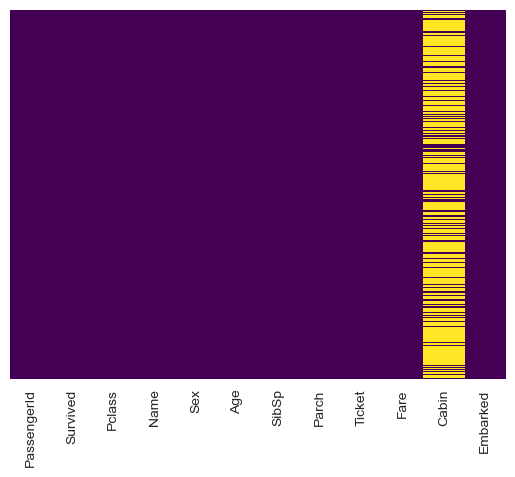

In [14]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
train.drop('Cabin',axis=1,inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [17]:
Sex= pd.get_dummies(train['Sex'],drop_first=True,dtype=int)
Embarked= pd.get_dummies(train['Embarked'],dtype=int)

In [18]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
train= pd.concat([train,Sex,Embarked],axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22,1,0,7.2500,1,0,0,1
1,2,1,1,38,1,0,71.2833,0,1,0,0
2,3,1,3,26,0,0,7.9250,0,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,0,1
